# Частина 2

**В цій частині ми знову будемо працювати з датасетом fasion_mnist. На відміну від попереднього завдання вам пропонується створити згорткову нейромережу, що використовує VGG16 в якості згорткової основи. Навчіть отриману мережу на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Під час навчання використовуйте прийоми донавчання та виділення ознак. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
import keras
import numpy as np
from keras import layers
from keras import models
from keras import utils
import matplotlib.pyplot as plt
import time
import seaborn as sns

from keras.applications import VGG16
from keras.utils import to_categorical

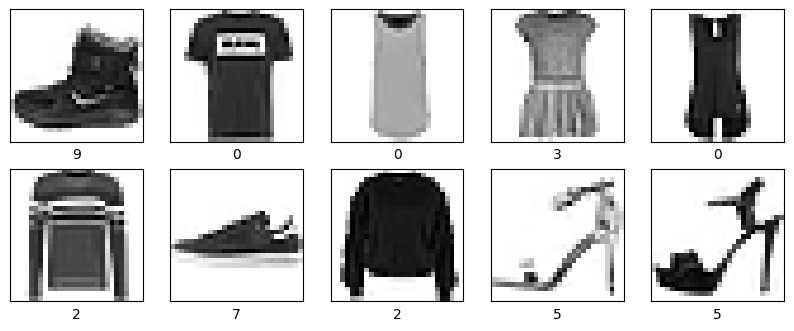

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

**VGG16 навчена на зображеннях розміром 224 х 224 пікселів. Наші зображення у наборі даних мають розмір 28 x 28 пікселів, їх необхідно змінити до відповідного розміру для правильної роботи згорткової основи VGG16**

In [3]:
print("Розмір x_train перед зміною розміру:", x_train.shape)
print("Розмір x_test перед зміною розміру:", x_test.shape)

# Змінемо розмір зображень
x_train = tf.image.resize(np.array(x_train)[..., tf.newaxis], 
                         (32, 32))
x_train = np.repeat(x_train, 3, 
                    axis=-1)

x_test = tf.image.resize(np.array(x_test)[..., tf.newaxis], 
                         (32, 32))
x_test = np.repeat(x_test, 3, 
                   axis=-1)

print("Розмір x_train після зміни розміру:", x_train.shape)
print("Розмір x_test після зміни розміру:", x_test.shape)

# Нормалізація значень пікселів
x_train = x_train / 255.0
x_test = x_test / 255.0

# Перетворення міток у формат категоріальних змінних
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


Розмір x_train перед зміною розміру: (60000, 28, 28)
Розмір x_test перед зміною розміру: (10000, 28, 28)
Розмір x_train після зміни розміру: (60000, 32, 32, 3)
Розмір x_test після зміни розміру: (10000, 32, 32, 3)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 478s 253ms/step - accuracy: 0.7689 - loss: 0.6661 - val_accuracy: 0.8460 - val_loss: 0.4240
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 428s 228ms/step - accuracy: 0.8485 - loss: 0.4085 - val_accuracy: 0.8538 - val_loss: 0.4018
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 433s 231ms/step - accuracy: 0.8619 - loss: 0.3670 - val_accuracy: 0.8505 - val_loss: 0.4050
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 418s 223ms/step - accuracy: 0.8755 - loss: 0.3370 - val_accuracy: 0.8643 - val_loss: 0.3782
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 387s 206ms/step - accuracy: 0.8753 - loss: 0.3274 - val_accuracy: 0.8663 - val_loss: 0.3738
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 391s 208ms/step - accuracy: 0.8835 - loss: 0.3083 - val_accuracy: 0.8659 - val_loss: 0.3716
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 398s 212ms/step - accuracy: 0.8892 - loss: 0.2937 - val_accuracy: 0.8651 - val_loss: 0.3706
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 400s 213ms/step - ac

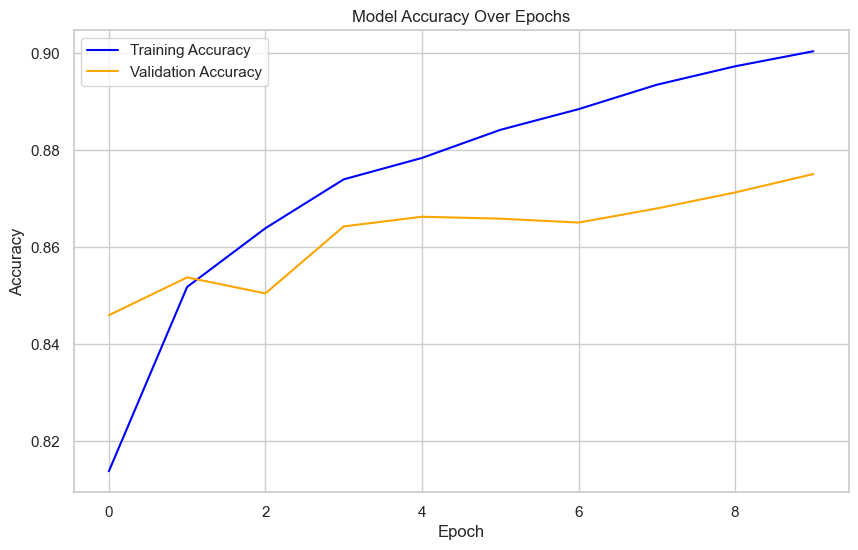

In [4]:
num_classes = 10

input_shape = x_train.shape[1:]

# Створення базової моделі VGG16
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Створення моделі класифікації на основі VGG16
model = models.Sequential([
    base_model,  
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

base_model.trainable = False

# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

time_start = time.time()
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
time_end = time.time()

print(f"This took {time_end-time_start} seconds to run.")

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.grid(True)
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Зробимо донавчання моделі. Для цього ми розморозимо декілька верхніх шарів базової моделі, перекомпелюємо її і перенавчимо**

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1667s 886ms/step - accuracy: 0.8832 - loss: 0.3106 - val_accuracy: 0.8942 - val_loss: 0.2981
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2550s 1s/step - accuracy: 0.9158 - loss: 0.2251 - val_accuracy: 0.8943 - val_loss: 0.3017
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2481s 1s/step - accuracy: 0.9277 - loss: 0.1951 - val_accuracy: 0.9088 - val_loss: 0.2639
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1933s 1s/step - accuracy: 0.9413 - loss: 0.1562 - val_accuracy: 0.9083 - val_loss: 0.2600
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4693s 3s/step - accuracy: 0.9478 - loss: 0.1415 - val_accuracy: 0.9124 - val_loss: 0.2608
This took 13324.28766322136 seconds to run.


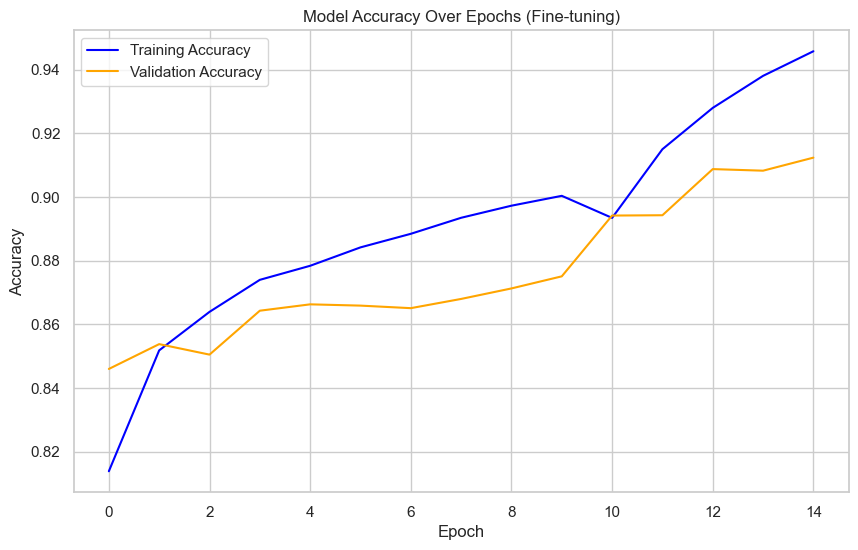

In [5]:
base_model.trainable = True

defrosting_layers = 20 
for layer in base_model.layers[:-defrosting_layers]:
    layer.trainable = False


model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

time_start_refresher_training = time.time()
history_refresher_training = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
time_end_refresher_training = time.time()

print(f"This took {time_end_refresher_training - time_start_refresher_training} seconds to run.")

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'] + history_refresher_training.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'] + history_refresher_training.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.grid(True)
plt.title('Model Accuracy Over Epochs (Fine-tuning)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Донавчання показало позитивний результат, точність збільшилась до 94,78%. Функція втрат на навчальному наборі даних зменшується з кожною епохою, що вказує на те, що модель стає більш впевненою в прогнозах. Єдиним мінусом можна назвати час донавчання, він значно збільшився, порівняно з навчанням згорткової нейромережі на згортковій основі VGG16**

**Останній результат 94,78% - є найкращим, якщо порівнювати з прикладами в ДЗ 10-1 та в ДЗ 9**